In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from torchvision import datasets,transforms

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print("X train shape ",x_train.shape)
print("X test shape ",x_test.shape)

X train shape  (60000, 28, 28)
X test shape  (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

In [ ]:
shuffle_idx = np.random.permutation(60000)
x_train , y_train = x_train[shuffle_idx] , y_train[shuffle_idx]

In [ ]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

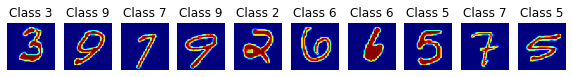

In [ ]:
plt.figure(figsize = (10,4))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  plt.imshow(x_train[i].numpy().reshape(28, 28), cmap = 'jet')
  plt.title("Class " + str(int(y_train[i].item())))

In [ ]:
class threelayer(torch.nn.Module):
    
    def __init__(self,input,h1,h2,h3,output):
        super(threelayer,self).__init__()
        self.input = input
        self.h1 = h1
        self.h2 = h2
        self.h3 = h3
        self.output = output
        self.fc1 = torch.nn.Linear(self.input,self.h1)
        self.fn1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.h1,self.h2)
        self.fn2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(self.h2,self.output)
        self.fn3 = torch.nn.Softmax(dim=1)
    def forward(self,x):
        x = self.fc1(x)
        x = self.fn1(x)
        x = self.fc2(x)
        x = self.fn2(x)
        x = self.fc3(x)
        x = self.fn3(x)
        return x

In [ ]:
model = threelayer(784,50,50,50,10).to(device)

In [ ]:
print(model)

threelayer(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fn1): ReLU()
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fn2): ReLU()
  (fc3): Linear(in_features=50, out_features=10, bias=True)
  (fn3): Softmax(dim=1)
)


In [ ]:
optimizer = torch.optim.SGD(model.parameters() ,lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
y = y_train.type(torch.LongTensor)

....................
10.0% Completed
....................
20.0% Completed
....................
30.0% Completed
....................
40.0% Completed
....................
50.0% Completed
....................
60.0% Completed
....................
70.0% Completed
....................
80.0% Completed
....................
90.0% Completed
....................
100.0% Completed

Epoch 2000: train loss: 1.5878463983535767


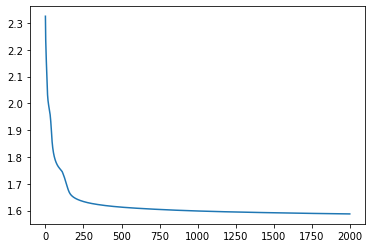

In [ ]:
model.train().to(device)
epoch = 2000
Loss =[]
for iter in range(epoch):
    optimizer.zero_grad()
    y_pred = model(x_train.to(device))
    loss = criterion(y_pred,y.to(device))
    Loss.append(loss.item())
    loss.backward()
    optimizer.step()
    if (iter % 10 == 0):
      print(".",end="")
    if (iter+1) % 200 == 0:
      print("\n{}% Completed".format(((iter+1)/epoch)*100))
print('\nEpoch {}: train loss: {}'.format(epoch, loss.item()))
plt.plot(np.arange(len(Loss)),Loss)

In [ ]:
predict =model(x_test.to(device)).cpu()

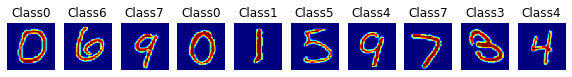

In [ ]:
plt.figure(figsize = (10,4))
for i in range(10,20):
  plt.subplot(1, 10, i+1-10)
  plt.axis('off')
  plt.imshow(x_test[i, :].numpy().reshape(28, 28), cmap = 'jet')
  ans = list(predict[i].detach().numpy())
  plt.title("Class" + str(ans.index(max(ans))))